In [39]:
# /mnt/c/Users/Student/Desktop/Project$ code Alz_Classification/


import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow_hub as hub



In [40]:


dataset = tf.keras.utils.image_dataset_from_directory(  
    "Alz_Datasets/Alz2/Axial/",
    shuffle = True,
    image_size = (256,170)
)


Found 5154 files belonging to 3 classes.


In [41]:
# parameters
batch_size = 32 # Hyperparamter 
image_height = 256
image_width = 170


In [42]:

train_dataset = tf.keras.utils.image_dataset_from_directory(
    "Alz_Datasets/Alz2/Axial/", # The path to the directory for images
    validation_split = 0.2, # Specifies the proportion of dataset used for validation(%20)
    subset = "training", 
    seed = 123, # Random seed for shuffling
    image_size = (image_height,image_width), # Size of image
    batch_size = (batch_size)
)


Found 5154 files belonging to 3 classes.
Using 4124 files for training.


In [43]:

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    "Alz_Datasets/Alz2/Axial/", # The path to the directory for images
    validation_split = 0.2, # Specifies the proportion of dataset used for validation(%20)
    subset = "validation",
    seed = 123, # Random seed for shuffling
    image_size = (image_height,image_width), # Size of image
    batch_size = (batch_size)
)


Found 5154 files belonging to 3 classes.
Using 1030 files for validation.


In [44]:

class_names = train_dataset.class_names # Identification of class names
print(class_names) 

['AD', 'CI', 'CN']


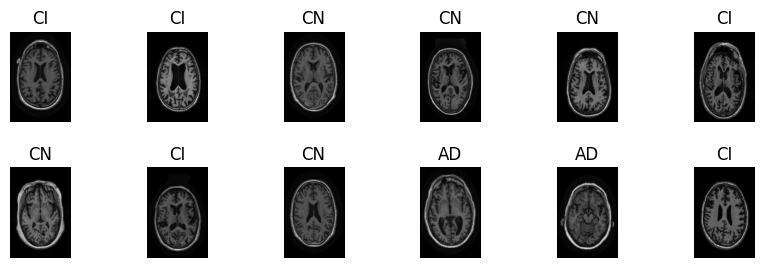

In [45]:
# Plots random 12 brain scans from dataset; just for something viusal
plt.figure(figsize=(10, 10)) # Creates a 10x10 size for the plot
for images, labels in train_dataset.take(1): # The loops the dataset and extracts batches of images with their corresponding labels
    for i in range(12): # Loops 12 times for 12 images
        ax = plt.subplot(6, 6, i + 1) # 6 rows 6 colums and selects current plot loctaion
        plt.imshow(images[i].numpy().astype("uint8")) # Image by converting it to numpy array and specifying its data type as integer unit8
        plt.title(class_names[labels[i]]) # Plots labels 
        plt.axis("off") # Removes Axis

plt.subplots_adjust(wspace=0.5, hspace=0.5) # Spaces images width and height from eachother

plt.show() # displays the plot


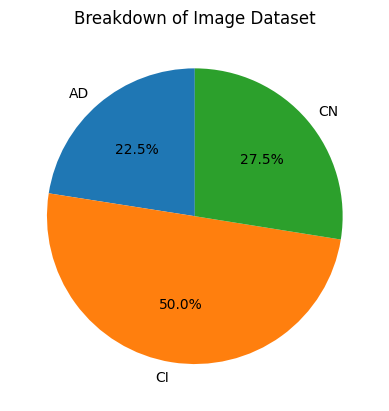

In [46]:

class_counts = [0] * len(class_names) #

for _, labels in train_dataset:
    for label in labels.numpy():
        class_counts[label] += 1


plt.pie(class_counts, labels=class_names, autopct='%1.1f%%', startangle=90) 
#Class Counts:data,labels:Class Names,autopct='%1.1f%%':Format of the percentage display,startangle=90 specifies the angle at which the first slice starts

plt.title('Breakdown of Image Dataset') # Plot Title


plt.show() # Displays the plot

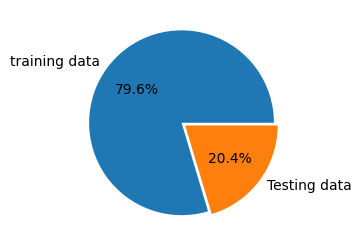

In [47]:
plt.figure(figsize=(3,3))
plt.pie(
    [len(train_dataset), len(validation_dataset)],
    labels=['training data','Testing data'],
    autopct='%.1f%%', explode=(0.05,0),
);

In [48]:
for image_batch, labels_batch in train_dataset:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


(32, 256, 170, 3)
(32,)


In [49]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_ds = train_dataset.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [50]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

num_classes = 3

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(
  optimizer= tf.keras.optimizers.Adam(learning_rate = 0.0001),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [51]:
model.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs= 5
)


Epoch 1/5


129/129 [==============================] - 28s 215ms/step - loss: 0.9673 - accuracy: 0.5293 - val_loss: 0.8196 - val_accuracy: 0.6272
Epoch 2/5
129/129 [==============================] - 25s 190ms/step - loss: 0.6800 - accuracy: 0.7214 - val_loss: 0.5213 - val_accuracy: 0.7932
Epoch 3/5
129/129 [==============================] - 24s 189ms/step - loss: 0.4132 - accuracy: 0.8506 - val_loss: 0.3095 - val_accuracy: 0.8961
Epoch 4/5
129/129 [==============================] - 24s 189ms/step - loss: 0.2307 - accuracy: 0.9282 - val_loss: 0.1850 - val_accuracy: 0.9466
Epoch 5/5
129/129 [==============================] - 25s 191ms/step - loss: 0.1262 - accuracy: 0.9663 - val_loss: 0.1136 - val_accuracy: 0.9650


In [52]:
model.save("model.keras")

In [53]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 256, 170, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 254, 168, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 84, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 82, 32)       9248      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 62, 41, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 39, 32)       

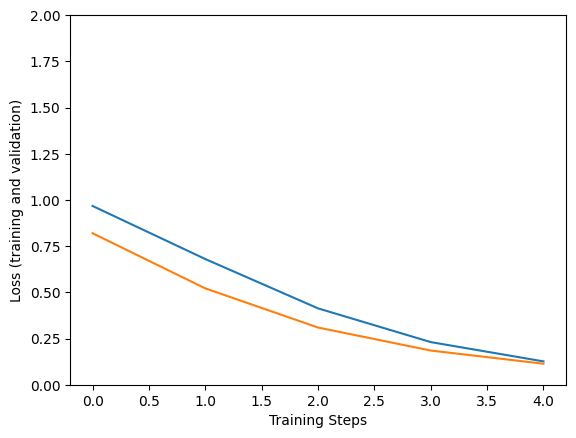

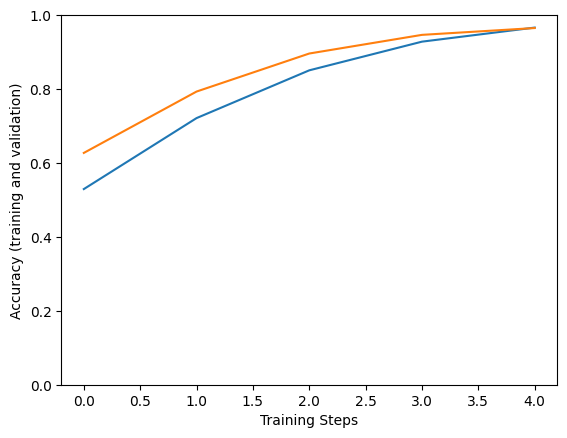

In [54]:
train_size = len(train_dataset)
valid_size = len(validation_dataset)
BATCH_SIZE = 32
steps_per_epoch = train_size // BATCH_SIZE
validation_steps = valid_size // BATCH_SIZE


hist = model.history.history


plt.figure()
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])

plt.figure()
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])